In [2]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


#**Criando Árvore de Decisão com rpart**

##Criando DataFrame

In [5]:
%%R
?expand.grid # Create a data frame from all combinations of the supplied Vectors or Factors. {base}
clima <- expand.grid(Tempo = c("Ensolarado","Nublado","Chuvoso"), 
                     Temperatura = c("Quente","Ameno","Frio"), 
                     Humidade = c("Alta","Normal"), 
                     Vento = c("Fraco","Forte"))
print(clima)

# Diversas combinações são realizadas

        Tempo Temperatura Humidade Vento
1  Ensolarado      Quente     Alta Fraco
2     Nublado      Quente     Alta Fraco
3     Chuvoso      Quente     Alta Fraco
4  Ensolarado       Ameno     Alta Fraco
5     Nublado       Ameno     Alta Fraco
6     Chuvoso       Ameno     Alta Fraco
7  Ensolarado        Frio     Alta Fraco
8     Nublado        Frio     Alta Fraco
9     Chuvoso        Frio     Alta Fraco
10 Ensolarado      Quente   Normal Fraco
11    Nublado      Quente   Normal Fraco
12    Chuvoso      Quente   Normal Fraco
13 Ensolarado       Ameno   Normal Fraco
14    Nublado       Ameno   Normal Fraco
15    Chuvoso       Ameno   Normal Fraco
16 Ensolarado        Frio   Normal Fraco
17    Nublado        Frio   Normal Fraco
18    Chuvoso        Frio   Normal Fraco
19 Ensolarado      Quente     Alta Forte
20    Nublado      Quente     Alta Forte
21    Chuvoso      Quente     Alta Forte
22 Ensolarado       Ameno     Alta Forte
23    Nublado       Ameno     Alta Forte
24    Chuvoso   

##Visualizando DataFrame

In [ ]:
%%R
#View(clima)

##Limitar as combinações passando Vetor para selecionar as linhas como índice

In [6]:
%%R
response <- c(1, 19, 4, 31, 16, 2, 11, 23, 35, 6, 24, 15, 18, 36) 

##Gerando um vetor do tipo fator para a Variável target

In [8]:
%%R
play <- as.factor(c("Não Jogar", "Não Jogar", "Não Jogar", "Jogar", "Jogar", "Jogar", "Jogar", "Jogar", "Jogar", "Jogar", "Não Jogar", "Jogar", "Jogar", "Não Jogar")) 

##Criando DataFrame final

In [9]:
%%R
# retornar todas as linhas que tenham como índice o vetor response e todas as colunas.
tennis <- data.frame(clima[response,], play)
# View(tennis)

##Carregando pacote rpart

In [ ]:
%%R
install.packages("rpart")
library(rpart) 

##Criando modelo

In [11]:
%%R
# Criando o modelo
?rpart
?rpart.control
tennis_tree <- rpart(play ~ ., 
                     data = tennis, 
                     method = "class", 
                     parms = list(split = "information"), 
                     control = rpart.control(minsplit = 1))

##Visualizando ganho de informação para cada atributo

In [12]:
%%R
# Visualizando o ganho de informação para cada atributo
tennis_tree 

n= 14 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 14 5 Jogar (0.6428571 0.3571429)  
   2) Tempo=Nublado 4 0 Jogar (1.0000000 0.0000000) *
   3) Tempo=Ensolarado,Chuvoso 10 5 Jogar (0.5000000 0.5000000)  
     6) Humidade=Normal 5 1 Jogar (0.8000000 0.2000000)  
      12) Vento=Fraco 3 0 Jogar (1.0000000 0.0000000) *
      13) Vento=Forte 2 1 Jogar (0.5000000 0.5000000)  
        26) Tempo=Ensolarado 1 0 Jogar (1.0000000 0.0000000) *
        27) Tempo=Chuvoso 1 0 Não Jogar (0.0000000 1.0000000) *
     7) Humidade=Alta 5 1 Não Jogar (0.2000000 0.8000000)  
      14) Tempo=Chuvoso 2 1 Jogar (0.5000000 0.5000000)  
        28) Vento=Fraco 1 0 Jogar (1.0000000 0.0000000) *
        29) Vento=Forte 1 0 Não Jogar (0.0000000 1.0000000) *
      15) Tempo=Ensolarado 3 0 Não Jogar (0.0000000 1.0000000) *


##Gerando o plot de tennis tree


In [ ]:
%%R
install.packages("rpart.plot")
library(rpart.plot) 

##Plot



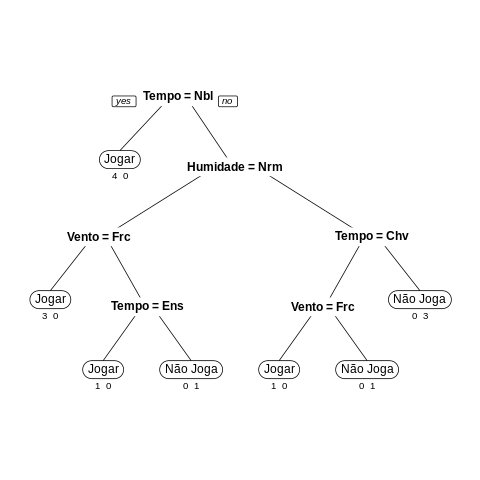

In [14]:
%%R
?prp
prp(tennis_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)

##Interpretando a Árvore de Decisão

 Para ler os nós da árvore, basta iniciar a partir do nó superior, que corresponde aos dados de treinamento original e, em seguida, começar a ler as regras. 
 
 Cada nó tem duas derivações: O ramo esquerdo significa que a regra superior é verdadeira  e a direita significa que ela é falsa.

 À esquerda da primeira regra, você vê uma regra terminal importante (uma folha terminal), em um círculo, indicando um resultado positivo, Jogar, que você pode ler como jogar tênis = Verdadeiro.
 
 Os números sob a folha terminal mostram quatro exemplos afirmando que esta regra é "yes" e zero afirmando "no".

Considerando o atributo "Vento" que pode ter os valores "Fraco" ou "Forte". Calcula-se então a entropia para cada um desses valores e depois a diferença entre a entropia do atributo vento e a soma das entropias de cada um dos valores associados ao atributo, multiplicado pela proporção de exemplos particionados de acordo com o valor (separados de um lado os exemplos com Vento = "Fraco" e do outro lado Vento = "Forte").

Frequentemente, as regras de árvore de decisão não são imediatamente utilizáveis, e você precisa interpretá-las antes do uso. No entanto, eles são claramente inteligíveis (e muito melhor do que um coeficiente de vetores de valores).


##Fazendo previsões com o modelo

In [15]:
%%R
clima <- expand.grid(Tempo = c("Ensolarado","Nublado","Chuvoso"), 
                           Temperatura = c("Quente","Ameno","Frio"), 
                           Humidade = c("Alta","Normal"), 
                           Vento = c("Fraco","Forte")) 

##Vetor para seleionar as linhas

In [16]:
%%R
response <- c(2, 20, 3, 33, 17, 4, 5)

##Novos dados

In [17]:
%%R
novos_dados <- data.frame(clima[response,])
#View(novos_dados)

##Previsões

In [18]:
%%R
#?predict
predict(tennis_tree, novos_dados)

   Jogar Não Jogar
2      1         0
20     1         0
3      1         0
33     0         1
17     1         0
4      0         1
5      1         0
